<a href="https://colab.research.google.com/github/singularis/machine_learning_learning/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 25 - Hierarchical Clustering/Python/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

## Using the dendrogram to find the optimal number of clusters

<function matplotlib.pyplot.show(close=None, block=None)>

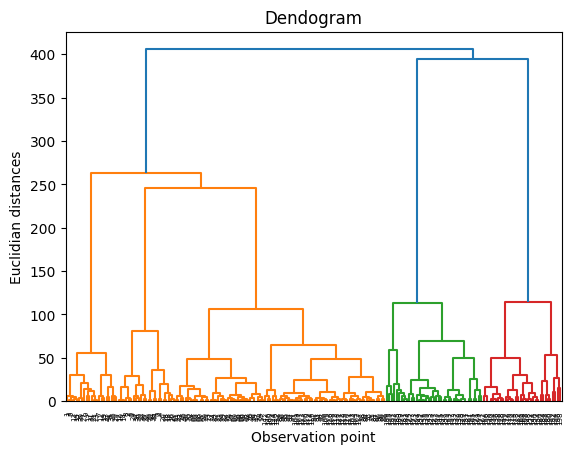

In [5]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Observation point')
plt.ylabel('Euclidian distances')
plt.show

## Training the Hierarchical Clustering model on the dataset

In [10]:
from sklearn.cluster import AgglomerativeClustering
clusters = 5
hc = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

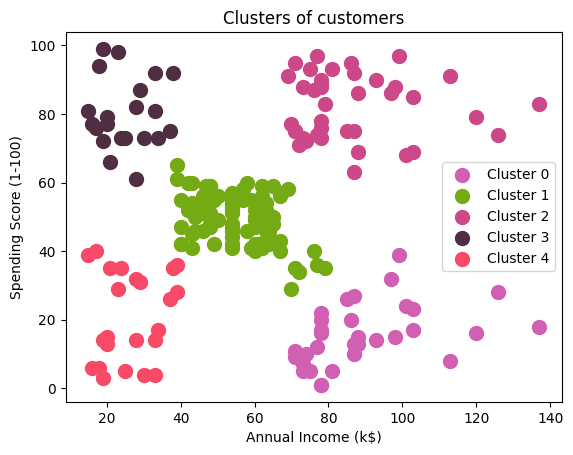

In [12]:
import random
for cluster in range(0,clusters):
  color = random.randrange(0, 2**24)
  hex_color = hex(color)
  std_color = "#" + hex_color[2:]
  plt.scatter(X[y_hc == cluster, 0], X[y_hc == cluster, 1], s = 100, c = std_color, label = f'Cluster {cluster}')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()